In [1]:
import torch
import random
import numpy as np
import pandas as pd

# Set seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)
random.seed(42)

# Load the data

In [2]:
# Get access to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
os.chdir('/content/drive/MyDrive/Hackathon')

Mounted at /content/drive


In [3]:
db = pd.read_excel('2008-epi-all-countries-winsorization.xls', sheet_name='EPI2008_all countries', header=0)
db.head(10)

,ISO3V10,Country,EPI_regions,GEO_subregion,Population2005,GDP_capita MRYA,landlock,landarea,density,EPI,...,MTI,EEZTD,IRRSTR,AGINT,AGSUB,BURNED,PEST,GHGCAP,CO2IND,CO2KWH
0,ABW,Aruba,Latin America and Caribbe,Caribbean,99.468,21800,0,189.12,100,,...,,0.142763,,,0,,0,,,648.621007
1,AFG,Afghanistan,South Asia,South Asia,29863,800,1,634924.74,4.7,,...,,,6.544618,0.894217,0,0.408179,0,1.391302,,356.266985
2,AGO,Angola,Sub-Saharan Africa,Southern Africa,15941.39,2314.403,0,1251895.62,0.2,39.494661,...,0.0016,0.25487,2.162564,0,0,15.311749,2,19.958624,1.190089,343
3,AIA,Anguilla,Latin America and Caribbe,Caribbean,12.205,8800,0,82.83,100,,...,,0.047098,,,0,,0,,,
4,ALB,Albania,Central and Eastern Europ,Central Europe,3129.678,4955.27,0,28346.12,34.3,83.950985,...,0,0.74919,0,6.212083,0,2.867217,2,2.850595,1.878786,34
5,AND,Andorra,Europe,Western Europe,67.151,38800,1,463.79,50,,...,,,0,0,0,,0,,,
6,ANT,Netherland Antilles,Latin America and Caribbe,Caribbean,182.656,16000,0,818.07,37.4,,...,,0.245093,,,0,,0,,,718
7,ARE,United Arab Emirates,Middle East and North Africa,Arabian Peninsula,4495.823,22698.3,0,74776.6,8.7,63.985812,...,0.0034,1,41.030839,0,0,0.524334,3,34.053479,5.494567,844
8,ARG,Argentina,Latin America and Caribbe,South America,38747.15,13652.41,0,2736296,1.3,81.783744,...,0.0044,0.824779,21.585966,13.673196,0,6.017469,20,8.933269,1.350751,306
9,ARM,Armenia,Middle East and North Africa,Eastern Europe,3016.312,5011.034,1,28272.73,30.3,77.754617,...,,,2.546567,3.490583,0,2.785754,22,3.266436,2.333797,138


# Preprocessing

## EDA: Exploratory Data Analysis

### Delete irrelevant columns

In [4]:
# Delete those columns that are irrelevant
db.drop(db.columns[range(28,54)], axis=1, inplace=True)

for i in ['ISO3V10', 'Country', 'EPI_regions', 'GEO_subregion', 'ENVHEALTH.1', 'GDP_capita MRYA']:
  del db[i]

db.head(10)

,Population2005,landlock,landarea,density,EPI,ENVHEALTH,ECOSYSTEM,AIR_E,WATER_E,BIODIVERSITY,...,MTI,EEZTD,IRRSTR,AGINT,AGSUB,BURNED,PEST,GHGCAP,CO2IND,CO2KWH
0,99.468,0,189.12,100,,,,67.413332,,0,...,,0.142763,,,0,,0,,,648.621007
1,29863,1,634924.74,4.7,,18.756562,,99.900301,70.710346,9.24523,...,,,6.544618,0.894217,0,0.408179,0,1.391302,,356.266985
2,15941.39,0,1251895.62,0.2,39.494661,8.934524,70.054799,49.22029,61.643939,58.926648,...,0.0016,0.25487,2.162564,0,0,15.311749,2,19.958624,1.190089,343
3,12.205,0,82.83,100,,,,,,33.333333,...,,0.047098,,,0,,0,,,
4,3129.678,0,28346.12,34.3,83.950985,89.270381,78.631589,99.148986,96.499752,4.024295,...,0,0.74919,0,6.212083,0,2.867217,2,2.850595,1.878786,34
5,67.151,1,463.79,50,,98.621377,,99.499617,,55.041509,...,,,0,0,0,,0,,,
6,182.656,0,818.07,37.4,,,,50,,18.163385,...,,0.245093,,,0,,0,,,718
7,4495.823,0,74776.6,8.7,63.985812,89.756349,38.215275,85.096771,27.074597,36.627862,...,0.0034,1,41.030839,0,0,0.524334,3,34.053479,5.494567,844
8,38747.15,0,2736296,1.3,81.783744,91.064361,72.503127,87.250007,74.877836,33.64991,...,0.0044,0.824779,21.585966,13.673196,0,6.017469,20,8.933269,1.350751,306
9,3016.312,1,28272.73,30.3,77.754617,88.038196,67.471038,99.418674,27.97534,16.042473,...,,,2.546567,3.490583,0,2.785754,22,3.266436,2.333797,138


In [5]:
db.columns

Index(['Population2005', 'landlock', 'landarea', 'density', 'EPI', 'ENVHEALTH',
       'ECOSYSTEM', 'AIR_E', 'WATER_E', 'BIODIVERSITY',
       'PRODUCTIVE_NATURAL_RESOURCES', 'CLIMATE', 'DALY', 'WATER_H', 'AIR_H',
       'AIR_E.1', 'WATER_E.1', 'BIODIVERSITY.1', 'FOREST', 'FISH',
       'AGRICULTURE', 'CLIMATE.1', 'ACSAT', 'WATSUP', 'DALY.1', 'INDOOR',
       'PM10', 'OZONE_H', 'SO2', 'OZONE_E', 'WATQI',
       'WATQI_GEMS station data.1', 'WATSTR', 'FORGRO', 'CRI', 'EFFCON', 'AZE',
       'MPAEEZ', 'MTI', 'EEZTD', 'IRRSTR', 'AGINT', 'AGSUB', 'BURNED', 'PEST',
       'GHGCAP', 'CO2IND', 'CO2KWH'],
      dtype='object')

### Transform columns to numeric

In [6]:
db.dtypes

,0
Population2005,object
landlock,object
landarea,object
density,object
EPI,object
ENVHEALTH,object
ECOSYSTEM,object
AIR_E,object
WATER_E,object
BIODIVERSITY,object


In [7]:
for col in db.columns:
    db[col] = pd.to_numeric(db[col], errors='coerce')
db.head(10)

,Population2005,landlock,landarea,density,EPI,ENVHEALTH,ECOSYSTEM,AIR_E,WATER_E,BIODIVERSITY,...,MTI,EEZTD,IRRSTR,AGINT,AGSUB,BURNED,PEST,GHGCAP,CO2IND,CO2KWH
0,99.468,0.0,189.12,100.0,NaN,NaN,NaN,67.413332,NaN,0.000000,...,NaN,0.142763,NaN,NaN,0.0,NaN,0.0,NaN,NaN,648.621007
1,29863.000,1.0,634924.74,4.7,NaN,18.756562,NaN,99.900301,70.710346,9.245230,...,NaN,NaN,6.544618,0.894217,0.0,0.408179,0.0,1.391302,NaN,356.266985
2,15941.390,0.0,1251895.62,0.2,39.494661,8.934524,70.054799,49.220290,61.643939,58.926648,...,0.0016,0.254870,2.162564,0.000000,0.0,15.311749,2.0,19.958624,1.190089,343.000000
3,12.205,0.0,82.83,100.0,NaN,NaN,NaN,NaN,NaN,33.333333,...,NaN,0.047098,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,3129.678,0.0,28346.12,34.3,83.950985,89.270381,78.631589,99.148986,96.499752,4.024295,...,0.0000,0.749190,0.000000,6.212083,0.0,2.867217,2.0,2.850595,1.878786,34.000000
5,67.151,1.0,463.79,50.0,NaN,98.621377,NaN,99.499617,NaN,55.041509,...,NaN,NaN,0.000000,0.000000,0.0,NaN,0.0,NaN,NaN,NaN
6,182.656,0.0,818.07,37.4,NaN,NaN,NaN,50.000000,NaN,18.163385,...,NaN,0.245093,NaN,NaN,0.0,NaN,0.0,NaN,NaN,718.000000
7,4495.823,0.0,74776.60,8.7,63.985812,89.756349,38.215275,85.096771,27.074597,36.627862,...,0.0034,1.000000,41.030839,0.000000,0.0,0.524334,3.0,34.053479,5.494567,844.000000
8,38747.150,0.0,2736296.00,1.3,81.783744,91.064361,72.503127,87.250007,74.877836,33.649910,...,0.0044,0.824779,21.585966,13.673196,0.0,6.017469,20.0,8.933269,1.350751,306.000000
9,3016.312,1.0,28272.73,30.3,77.754617,88.038196,67.471038,99.418674,27.975340,16.042473,...,NaN,NaN,2.546567,3.490583,0.0,2.785754,22.0,3.266436,2.333797,138.000000


In [8]:
db.dtypes

,0
Population2005,float64
landlock,float64
landarea,float64
density,float64
EPI,float64
ENVHEALTH,float64
ECOSYSTEM,float64
AIR_E,float64
WATER_E,float64
BIODIVERSITY,float64


### Null values

In [9]:
# NULL values
empty = db.apply(lambda col: pd.isnull(col)).sum()
empty[ empty > 0 ]

,0
Population2005,115
landlock,103
landarea,111
density,113
EPI,192
ENVHEALTH,173
ECOSYSTEM,187
AIR_E,127
WATER_E,172
BIODIVERSITY,135


In [10]:
from sklearn.impute import SimpleImputer

# Replace missing with the median of their corresponding column
imputer_num = SimpleImputer(strategy='median')
db = pd.DataFrame(imputer_num.fit_transform(db), columns=db.columns)

In [11]:
# NULL values
empty = db.apply(lambda col: pd.isnull(col)).sum()
empty[ empty > 0 ]

,0


### Correlation between variables

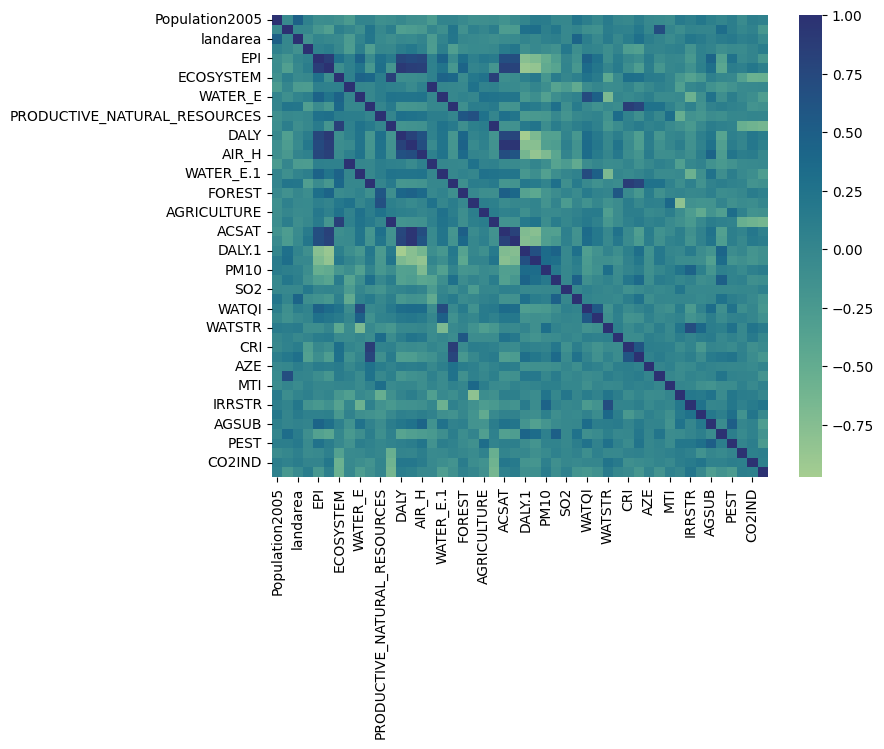

In [12]:
corr_db = db.corr(method="pearson")

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_db, annot=False, cmap='crest')
plt.show()

In [13]:
# Delete columns that have a correlation lower than -0.5 or 0.5, with respect to the target variable EPI
relevant_features = db.corr()['EPI'][abs(db.corr()['EPI']) > 0.5].index
db_filtered = db[relevant_features]

In [14]:
db_filtered.head(10)

,EPI,ENVHEALTH,DALY,WATER_H,AIR_H,ACSAT,WATSUP,DALY.1,INDOOR,PM10
0,74.102715,85.286425,93.240198,100.000000,73.570197,100.0,100.0,3.75,30.0,38.91060
1,74.102715,18.756562,6.264083,11.403509,51.094574,34.0,39.0,52.00,95.0,46.44371
2,39.494661,8.934524,0.000000,19.750990,15.987105,31.0,53.0,109.00,95.0,91.35495
3,74.102715,85.286425,93.240198,82.361819,73.570197,99.0,92.0,3.75,30.0,38.91060
4,83.950985,89.270381,99.459216,91.341256,66.821836,91.0,96.0,0.30,50.0,55.52398
5,74.102715,98.621377,99.639477,100.000000,95.206554,100.0,100.0,0.20,5.0,27.85881
6,74.102715,85.286425,93.240198,82.361819,73.570197,83.5,92.0,3.75,30.0,29.76592
7,63.985812,89.756349,98.918432,98.830409,62.358122,98.0,100.0,0.60,5.0,125.59790
8,81.783744,91.064361,98.017125,91.341256,76.881939,91.0,96.0,1.10,5.0,77.93632
9,77.754617,88.038196,98.197386,83.267308,72.490703,83.0,92.0,1.00,26.4,68.71374


In [15]:
# Delete columns that do not give any information, i.e, there are other columns that represent the same data
del db_filtered['DALY.1']
db_filtered.head(10)

,EPI,ENVHEALTH,DALY,WATER_H,AIR_H,ACSAT,WATSUP,INDOOR,PM10
0,74.102715,85.286425,93.240198,100.000000,73.570197,100.0,100.0,30.0,38.91060
1,74.102715,18.756562,6.264083,11.403509,51.094574,34.0,39.0,95.0,46.44371
2,39.494661,8.934524,0.000000,19.750990,15.987105,31.0,53.0,95.0,91.35495
3,74.102715,85.286425,93.240198,82.361819,73.570197,99.0,92.0,30.0,38.91060
4,83.950985,89.270381,99.459216,91.341256,66.821836,91.0,96.0,50.0,55.52398
5,74.102715,98.621377,99.639477,100.000000,95.206554,100.0,100.0,5.0,27.85881
6,74.102715,85.286425,93.240198,82.361819,73.570197,83.5,92.0,30.0,29.76592
7,63.985812,89.756349,98.918432,98.830409,62.358122,98.0,100.0,5.0,125.59790
8,81.783744,91.064361,98.017125,91.341256,76.881939,91.0,96.0,5.0,77.93632
9,77.754617,88.038196,98.197386,83.267308,72.490703,83.0,92.0,26.4,68.71374


In [16]:
db_filtered.columns

Index(['EPI', 'ENVHEALTH', 'DALY', 'WATER_H', 'AIR_H', 'ACSAT', 'WATSUP',
       'INDOOR', 'PM10'],
      dtype='object')

Features:
*   ENVHEALTH: Environmental Health
*   DALY: Environmental burden of disease (DALYs)
*   WATER_H: Water (effects on humans)
*   AIR_H: Air Pollution (effects on humans)
*   ACSAT: Adequate sanitation
*   WATSUP: Drinking water
*   INDOOR: Indoor air pollution
*   PM10: Urban particulates

Target:
*   EPI: Environmental Performance Index (EPI)


## Sampling the data

In [17]:
# Create 200 new instances
sample = db_filtered.sample(n=200, replace=True)
db_combined = pd.concat([db_filtered, sample], ignore_index=True)

In [18]:
db_combined

,EPI,ENVHEALTH,DALY,WATER_H,AIR_H,ACSAT,WATSUP,INDOOR,PM10
0,74.102715,85.286425,93.240198,100.000000,73.570197,100.0,100.0,30.0,38.91060
1,74.102715,18.756562,6.264083,11.403509,51.094574,34.0,39.0,95.0,46.44371
2,39.494661,8.934524,0.000000,19.750990,15.987105,31.0,53.0,95.0,91.35495
3,74.102715,85.286425,93.240198,82.361819,73.570197,99.0,92.0,30.0,38.91060
4,83.950985,89.270381,99.459216,91.341256,66.821836,91.0,96.0,50.0,55.52398
...,...,...,...,...,...,...,...,...,...
536,82.291583,88.938043,98.197386,100.000000,59.357401,100.0,100.0,5.0,134.23830
537,79.525890,78.762204,97.296079,76.910017,43.546642,91.0,79.0,67.1,103.79920
538,88.811180,95.227325,99.459216,86.285606,95.705263,78.0,99.0,10.2,15.85056
539,74.102715,85.286425,93.240198,82.361819,73.570197,83.5,92.0,30.0,38.91060


# Preprocessing

In [19]:
X = db_combined.drop('EPI', axis='columns')
y = db_combined['EPI']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Model

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor()

# Train rf model
rf.fit(X_train, y_train)

# Predict with test dataset
y_pred = rf.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for y_pred: {mae}")

Mean Absolute Error for y_pred: 1.779199938082848


We can observe the model performs pretty well, being the MAE 1.78 out of 100.

## Define function for inputing unknown data

In [25]:
def EPI_predictor(data, model):
  pred = model.predict(data)
  return pred

In [26]:
def get_user_input():
    print("Please input the following details:")

    # Attributes to collect
    envhealth = float(input("Enviromental Health: "))
    daly = float(input("Environmental burden of disease (DALYs): "))
    water_h = float(input("Water (effects on humans): "))
    air_h = float(input("Air Pollution (effects on humans): "))
    acsat = float(input("Adequate sanitation: "))
    watsup = float(input("Drinking water: "))
    indoor = float(input("Indoor air pollution: "))
    pm10 = float(input("Urban Particulates: "))

    # Here, we are creating a dictionary of input
    user_input = pd.DataFrame({
        "ENVHEALTH": [envhealth],
        "DALY": [daly],
        "WATER_H": [water_h],
        "AIR_H": [air_h],
        "ACSAT": [acsat],
        "WATSUP": [watsup],
        "INDOOR": [indoor],
        "PM10": [pm10],
    })
    return user_input

In [27]:
if __name__ == "__main__":
    # Collect user input
    user_data = get_user_input()
    # Predict the EPI score
    pred_EPI = EPI_predictor(user_data, rf)
    print(f"Predicted EPI score: {pred_EPI[0]}")

Please input the following details:
Enviromental Health: 99.38
Environmental burden of disease (DALYs): 99.82
Water (effects on humans): 100
Air Pollution (effects on humans): 97.88
Adequate sanitation: 100
Drinking water: 100
Indoor air pollution: 5
Urban Particulates: 18.69
Predicted EPI score: 81.89475062978615


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
